In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from pandas.tseries.offsets import DateOffset
import matplotlib.dates as mdates
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df_FPT = pd.read_csv('/kaggle/input/stock-dataset/FPT.csv')
df_MSN = pd.read_csv('/kaggle/input/stock-dataset/MSN.csv')
df_PNJ = pd.read_csv('/kaggle/input/stock-dataset/PNJ.csv')
df_VIC = pd.read_csv('/kaggle/input/stock-dataset/VIC.csv')

In [3]:
display(df_FPT.head())
display(df_MSN.head())
display(df_PNJ.head())
display(df_VIC.head())

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0


,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,MSN,12/25/2017 9:15,73.1,73.1,73.1,73.1,4210,0
1,MSN,12/25/2017 9:16,73.0,73.0,73.0,73.0,5000,0
2,MSN,12/25/2017 9:18,73.5,73.5,73.5,73.5,210,0
3,MSN,12/25/2017 9:20,73.2,73.5,73.1,73.1,2050,0
4,MSN,12/25/2017 9:21,73.0,73.0,73.0,73.0,1380,0


,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,PNJ,2/28/2018 9:15,78.14,78.99,78.14,78.99,270,0
1,PNJ,2/28/2018 9:16,78.94,78.94,78.94,78.94,10,0
2,PNJ,2/28/2018 9:19,78.14,78.14,78.14,78.14,283,0
3,PNJ,2/28/2018 9:20,78.14,78.14,78.14,78.14,480,0
4,PNJ,2/28/2018 9:21,78.14,78.14,78.14,78.14,146,0


,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,VIC,10/17/2018 9:39,98.5,98.5,98.5,98.5,390,0
1,VIC,10/17/2018 9:40,98.5,98.5,98.5,98.5,760,0
2,VIC,10/17/2018 9:41,98.6,98.6,98.6,98.6,2060,0
3,VIC,10/17/2018 9:42,98.6,98.6,98.6,98.6,5540,0
4,VIC,10/17/2018 9:43,98.6,98.7,98.6,98.7,760,0


In [4]:
display(df_FPT.isna().sum())

Ticker           0
Date/Time        0
Open             0
High             0
Low              0
Close            0
Volume           0
Open Interest    0
dtype: int64

In [5]:
display(df_MSN.isna().sum())

Ticker           0
Date/Time        0
Open             0
High             0
Low              0
Close            0
Volume           0
Open Interest    0
dtype: int64

In [6]:
display(df_PNJ.isna().sum())

Ticker           0
Date/Time        0
Open             0
High             0
Low              0
Close            0
Volume           0
Open Interest    0
dtype: int64

In [7]:
display(df_VIC.isna().sum())

Ticker           0
Date/Time        0
Open             0
High             0
Low              0
Close            0
Volume           0
Open Interest    0
dtype: int64

In [8]:
display(df_FPT.describe(include='all'))

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
count,97406,97406,97406.000000,97406.000000,97406.000000,97406.000000,9.740600e+04,97406.0
unique,1,97406,NaN,NaN,NaN,NaN,NaN,NaN
top,FPT,12/22/2020 14:46,NaN,NaN,NaN,NaN,NaN,NaN
freq,97406,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,45.071630,45.090138,45.051430,45.071631,8.044173e+03,0.0
std,NaN,NaN,6.359803,6.364950,6.354245,6.359799,1.753203e+04,0.0
min,NaN,NaN,30.250000,30.250000,30.220000,30.250000,1.000000e+01,0.0
25%,NaN,NaN,39.740000,39.740000,39.700000,39.740000,7.500000e+02,0.0
50%,NaN,NaN,46.950000,46.950000,46.950000,46.950000,2.960000e+03,0.0
75%,NaN,NaN,49.200000,49.250000,49.170000,49.200000,8.960000e+03,0.0


In [9]:
display(df_MSN.describe(include='all'))

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
count,135354,135354,135354.000000,135354.000000,135354.000000,135354.000000,1.353540e+05,135354.0
unique,1,135354,NaN,NaN,NaN,NaN,NaN,NaN
top,MSN,12/22/2020 14:46,NaN,NaN,NaN,NaN,NaN,NaN
freq,135354,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,74.878809,74.931668,74.834625,74.880759,5.683578e+03,0.0
std,NaN,NaN,15.418074,15.426954,15.412677,15.418857,2.798513e+04,0.0
min,NaN,NaN,46.500000,46.500000,46.400000,46.400000,1.000000e+01,0.0
25%,NaN,NaN,57.900000,57.900000,57.800000,57.800000,5.000000e+02,0.0
50%,NaN,NaN,79.100000,79.200000,79.100000,79.100000,2.000000e+03,0.0
75%,NaN,NaN,86.000000,86.100000,86.000000,86.000000,5.560000e+03,0.0


In [10]:
display(df_PNJ.describe(include='all'))

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
count,125309,125309,125309.000000,125309.000000,125309.000000,125309.000000,125309.000000,125309.0
unique,1,125309,NaN,NaN,NaN,NaN,NaN,NaN
top,PNJ,12/22/2020 14:46,NaN,NaN,NaN,NaN,NaN,NaN
freq,125309,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,72.182052,72.372590,72.042287,72.179371,3031.830451,0.0
std,NaN,NaN,9.900263,9.995786,9.830847,9.899401,7248.952968,0.0
min,NaN,NaN,44.430000,44.530000,44.040000,44.140000,1.000000,0.0
25%,NaN,NaN,64.600000,64.700000,64.570000,64.600000,220.000000,0.0
50%,NaN,NaN,72.800000,73.010000,72.640000,72.830000,1000.000000,0.0
75%,NaN,NaN,80.160000,80.350000,80.060000,80.160000,3130.000000,0.0


In [11]:
display(df_VIC.describe(include='all'))

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
count,101266,101266,101266.000000,101266.000000,101266.000000,101266.000000,1.012660e+05,101266.0
unique,1,101266,NaN,NaN,NaN,NaN,NaN,NaN
top,VIC,12/22/2020 14:46,NaN,NaN,NaN,NaN,NaN,NaN
freq,101266,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,105.376460,105.418519,105.334147,105.378791,3.182640e+03,0.0
std,NaN,NaN,11.543158,11.535584,11.552338,11.545054,1.469814e+04,0.0
min,NaN,NaN,68.000000,68.000000,68.000000,68.000000,1.000000e+01,0.0
25%,NaN,NaN,95.400000,95.400000,95.300000,95.400000,2.300000e+02,0.0
50%,NaN,NaN,105.300000,105.300000,105.200000,105.300000,1.020000e+03,0.0
75%,NaN,NaN,115.800000,115.900000,115.800000,115.800000,3.000000e+03,0.0


In [12]:
display(df_FPT.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97406 entries, 0 to 97405
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ticker         97406 non-null  object 
 1   Date/Time      97406 non-null  object 
 2   Open           97406 non-null  float64
 3   High           97406 non-null  float64
 4   Low            97406 non-null  float64
 5   Close          97406 non-null  float64
 6   Volume         97406 non-null  int64  
 7   Open Interest  97406 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 5.9+ MB


None

In [13]:
display(df_MSN.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135354 entries, 0 to 135353
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Ticker         135354 non-null  object 
 1   Date/Time      135354 non-null  object 
 2   Open           135354 non-null  float64
 3   High           135354 non-null  float64
 4   Low            135354 non-null  float64
 5   Close          135354 non-null  float64
 6   Volume         135354 non-null  int64  
 7   Open Interest  135354 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 8.3+ MB


None

In [14]:
display(df_PNJ.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125309 entries, 0 to 125308
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Ticker         125309 non-null  object 
 1   Date/Time      125309 non-null  object 
 2   Open           125309 non-null  float64
 3   High           125309 non-null  float64
 4   Low            125309 non-null  float64
 5   Close          125309 non-null  float64
 6   Volume         125309 non-null  int64  
 7   Open Interest  125309 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 7.6+ MB


None

In [15]:
display(df_VIC.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101266 entries, 0 to 101265
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Ticker         101266 non-null  object 
 1   Date/Time      101266 non-null  object 
 2   Open           101266 non-null  float64
 3   High           101266 non-null  float64
 4   Low            101266 non-null  float64
 5   Close          101266 non-null  float64
 6   Volume         101266 non-null  int64  
 7   Open Interest  101266 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 6.2+ MB


None

In [8]:
display(df_FPT.duplicated().sum())

0

In [37]:
display(df_MSN.duplicated().sum())

0

In [38]:
display(df_PNJ.duplicated().sum())

0

In [39]:
display(df_VIC.duplicated().sum())

0

In [40]:
display(df_FPT.columns)
display(df_MSN.columns)
display(df_PNJ.columns)
display(df_VIC.columns)

Index(['Ticker', 'Date/Time', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Open Interest'],
      dtype='object')

Index(['Ticker', 'Date/Time', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Open Interest'],
      dtype='object')

Index(['Ticker', 'Date/Time', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Open Interest'],
      dtype='object')

Index(['Ticker', 'Date/Time', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Open Interest'],
      dtype='object')

In [4]:
df = pd.concat([df_FPT,df_MSN,df_PNJ,df_VIC])

In [42]:
df.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0


In [43]:
df.tail()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
101261,VIC,12/22/2020 14:22,105.8,105.8,105.7,105.7,1870,0
101262,VIC,12/22/2020 14:23,105.7,105.7,105.7,105.7,2510,0
101263,VIC,12/22/2020 14:24,105.7,105.7,105.7,105.7,3620,0
101264,VIC,12/22/2020 14:25,105.7,105.7,105.7,105.7,100,0
101265,VIC,12/22/2020 14:46,105.7,105.7,105.7,105.7,90,0


In [44]:
len(df)

459335

<Axes: xlabel='Ticker', ylabel='count'>

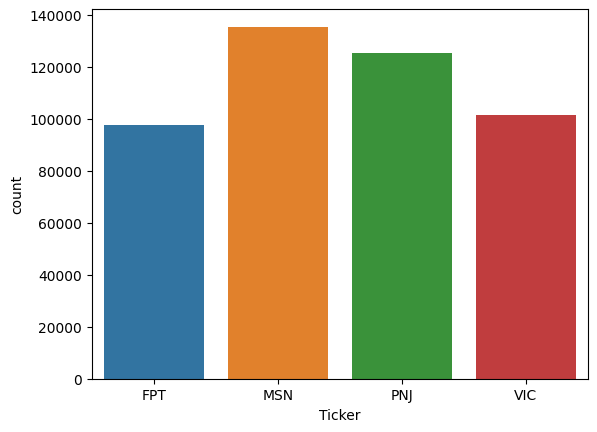

In [5]:
sns.countplot(
    x=df['Ticker']
)

# Dữ liệu FPT

In [50]:
def smart_price_change(df, N=1, time_unit="minute"):
    required_columns = ['Ticker', 'Date/Time', 'Close']
    if not all(col in df.columns for col in required_columns):
        raise ValueError(f"DataFrame must contain columns: {required_columns}")
    
    df = df.copy()
    df['Date/Time'] = pd.to_datetime(df['Date/Time'])
    
    future_prices = df[['Ticker', 'Date/Time', 'Close']].copy()
    
    if time_unit == "minute":
        future_prices['Target_Date'] = future_prices['Date/Time'] + timedelta(minutes=N)
        tolerance = timedelta(minutes=N * 2)
    elif time_unit == "hour":
        future_prices['Target_Date'] = future_prices['Date/Time'] + timedelta(hours=N)
        tolerance = timedelta(hours=N * 2)
    elif time_unit == "day":
        future_prices['Target_Date'] = future_prices['Date/Time'] + timedelta(days=N)
        tolerance = timedelta(days=N * 2)
    elif time_unit == "month":
        future_prices['Target_Date'] = future_prices['Date/Time'] + DateOffset(months=N)
        tolerance = timedelta(days=7)
    else:
        raise ValueError("time_unit phải là 'minute', 'hour', 'day' hoặc 'month'.")
    
    df = df.sort_values('Date/Time')
    future_prices = future_prices.sort_values('Target_Date')
    
    merged = pd.merge_asof(
        df,
        future_prices,
        by='Ticker',
        left_on='Date/Time',
        right_on='Target_Date',
        tolerance=tolerance,
        direction='forward'
    )
    
    merged['Price_Change'] = merged['Close_y'] - merged['Close_x']
    merged['Pct_Change'] = (merged['Price_Change'] / merged['Close_x']) * 100
    
    merged = merged.dropna(subset=['Close_y']).rename(columns={
        'Close_x': 'Close',
        'Close_y': 'Future_Close'
    })
    
    return merged

In [19]:
df_FPT['Date/Time'] = pd.to_datetime(df_FPT['Date/Time'])

In [20]:
display(df_FPT.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97406 entries, 0 to 97405
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Ticker         97406 non-null  object        
 1   Date/Time      97406 non-null  datetime64[ns]
 2   Open           97406 non-null  float64       
 3   High           97406 non-null  float64       
 4   Low            97406 non-null  float64       
 5   Close          97406 non-null  float64       
 6   Volume         97406 non-null  int64         
 7   Open Interest  97406 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 5.9+ MB


None

In [51]:
# Dữ liệu biến động 60 phút
df_FPT_60min = smart_price_change(df_FPT, 60, time_unit="minute")

In [22]:
# Dữ liệu biến động 12 tiếng
df_FPT_12hourly = smart_price_change(df_FPT, 12, time_unit="hour")

In [23]:
# Dữ liệu biến động 3 ngày
df_FPT_3daily = smart_price_change(df_FPT, 3, time_unit="day")

In [47]:
# Dữ liệu biến động 1 tháng
df_FPT_1monthly = smart_price_change(df_FPT, 1, time_unit="month")

In [44]:
display(df_FPT_60min.head())

,Ticker,Date/Time_x,Open,High,Low,Close,Volume,Open Interest,Date/Time_y,Future_Close,Target_Date,Price_Change,Pct_Change
0,FPT,2018-12-25 09:15:00,30.89,30.89,30.89,30.89,35410,0,2018-12-25 09:15:00,30.89,2018-12-25 10:15:00,0.00,0.000000
1,FPT,2018-12-25 09:16:00,30.81,30.81,30.81,30.81,190,0,2018-12-25 09:15:00,30.89,2018-12-25 10:15:00,0.08,0.259656
2,FPT,2018-12-25 09:17:00,30.74,30.81,30.74,30.74,1120,0,2018-12-25 09:15:00,30.89,2018-12-25 10:15:00,0.15,0.487964
3,FPT,2018-12-25 09:18:00,30.74,30.74,30.74,30.74,2120,0,2018-12-25 09:15:00,30.89,2018-12-25 10:15:00,0.15,0.487964
4,FPT,2018-12-25 09:19:00,30.74,30.74,30.74,30.74,22500,0,2018-12-25 09:15:00,30.89,2018-12-25 10:15:00,0.15,0.487964


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_stock_price_change(df, ticker, N=60, time_unit="minute"):
    """
    Vẽ biểu đồ biến động giá cổ phiếu cho một mã cổ phiếu cụ thể sau N phút, giờ, ngày hoặc tháng.

    Args:
        df (pd.DataFrame): Dữ liệu đã xử lý từ `smart_price_change()`, chứa các cột
                          ['Ticker', 'Date/Time', 'Close', 'Future_Close', 'Price_Change', 'Pct_Change'].
        ticker (str): Mã cổ phiếu cần vẽ (ví dụ: 'FPT').
        N (int): Khoảng thời gian để dự báo.
        time_unit (str): Đơn vị thời gian ("minute", "hour", "day", "month").
    """
    # Kiểm tra xem ticker có trong DataFrame không
    if ticker not in df['Ticker'].values:
        raise ValueError(f"Mã cổ phiếu '{ticker}' không có trong DataFrame.")

    # Lọc dữ liệu cho mã cổ phiếu cụ thể
    ticker_data = df[df['Ticker'] == ticker].sort_values('Date/Time_x')

    # Kiểm tra các cột cần thiết
    required_columns = ['Date/Time_x', 'Close', 'Future_Close']
    if not all(col in ticker_data.columns for col in required_columns):
        raise ValueError(f"DataFrame phải chứa các cột: {required_columns}")

    # Thiết lập kiểu biểu đồ
    plt.style.use('seaborn-v0_8')

    # Tạo biểu đồ
    plt.figure(figsize=(14, 6))
    plt.title(f'Biến động giá {ticker} sau {N} {time_unit}(s)', fontsize=16)

    # Vẽ giá hiện tại
    plt.plot(ticker_data['Date/Time_x'], ticker_data['Close'], 
             color='navy', label='Giá hiện tại', marker='x', markersize=4, linewidth=0.5)

    # Vẽ giá tương lai
    plt.plot(ticker_data['Date/Time_x'], ticker_data['Future_Close'], 
             color='purple', linestyle='--', label=f'Giá sau {N} {time_unit}(s)', 
             marker='x', markersize=4, linewidth=0.5)

    # Đặt nhãn trục
    plt.xlabel('Thời gian')
    plt.ylabel('Giá (VNĐ)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)

    # Định dạng trục x
    plt.xticks(rotation=45, ha='right')
    plt.gca().xaxis.set_major_formatter(
        mdates.DateFormatter('%H:%M' if time_unit in ['minute', 'hour'] else '%Y-%m-%d')
    )

    plt.tight_layout()
    plt.show()

<ipython-input-52-84aa875bacb2>:56: UserWarning: Glyph 7901 (\N{LATIN SMALL LETTER O WITH HORN AND GRAVE}) missing from current font.
  plt.tight_layout()
<ipython-input-52-84aa875bacb2>:56: UserWarning: Glyph 7871 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  plt.tight_layout()
<ipython-input-52-84aa875bacb2>:56: UserWarning: Glyph 7897 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND DOT BELOW}) missing from current font.
  plt.tight_layout()
<ipython-input-52-84aa875bacb2>:56: UserWarning: Glyph 7879 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND DOT BELOW}) missing from current font.
  plt.tight_layout()
<ipython-input-52-84aa875bacb2>:56: UserWarning: Glyph 7841 (\N{LATIN SMALL LETTER A WITH DOT BELOW}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7871 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  fig.canvas.print_figure(by

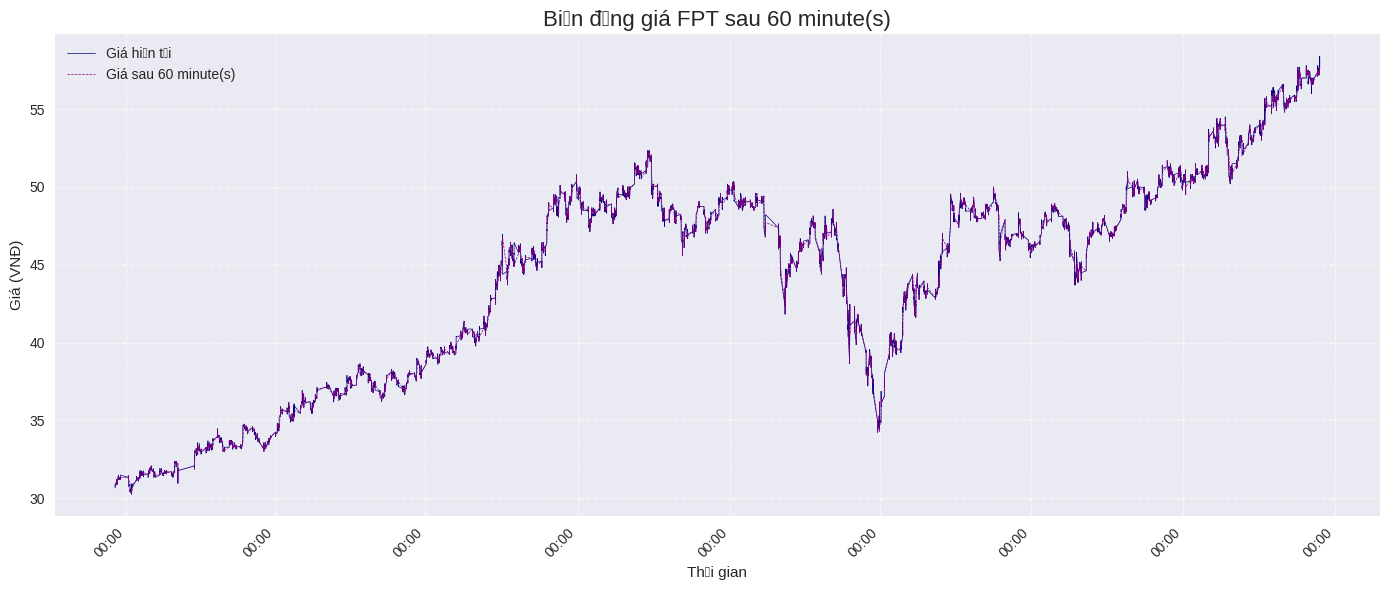

In [53]:
plot_stock_price_change(df_FPT_60min, "FPT", N=60, time_unit="minute")

<ipython-input-45-84aa875bacb2>:56: UserWarning: Glyph 7901 (\N{LATIN SMALL LETTER O WITH HORN AND GRAVE}) missing from current font.
  plt.tight_layout()
<ipython-input-45-84aa875bacb2>:56: UserWarning: Glyph 7871 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  plt.tight_layout()
<ipython-input-45-84aa875bacb2>:56: UserWarning: Glyph 7897 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND DOT BELOW}) missing from current font.
  plt.tight_layout()
<ipython-input-45-84aa875bacb2>:56: UserWarning: Glyph 7879 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND DOT BELOW}) missing from current font.
  plt.tight_layout()
<ipython-input-45-84aa875bacb2>:56: UserWarning: Glyph 7841 (\N{LATIN SMALL LETTER A WITH DOT BELOW}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7871 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  fig.canvas.print_figure(by

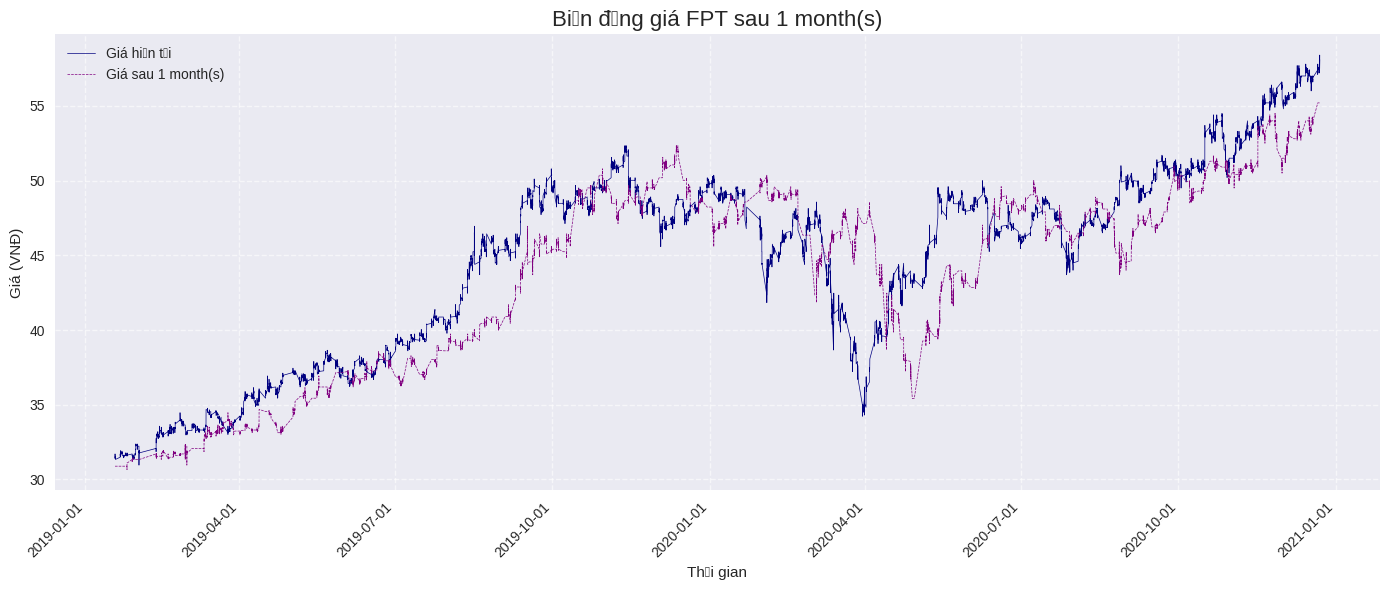

In [49]:
plot_stock_price_change(df_FPT_1monthly,"FPT", N=1, time_unit="month")

In [54]:
def create_features(df, date_column="Date/Time_x"):
    required_columns = ['Ticker', date_column, 'Open', 'High', 'Low', 'Close', 'Volume']
    if not all(col in df.columns for col in required_columns):
        raise ValueError(f"DataFrame must contain columns: {required_columns}")
    
    df = df.copy()
    df[date_column] = pd.to_datetime(df[date_column])
    
    df['Hour'] = df[date_column].dt.hour
    df['DayOfWeek'] = df[date_column].dt.dayofweek
    df['Month'] = df[date_column].dt.month
    
    df['MA_5'] = df.groupby('Ticker')['Close'].transform(lambda x: x.rolling(5, min_periods=1).mean())
    df['MA_10'] = df.groupby('Ticker')['Close'].transform(lambda x: x.rolling(10, min_periods=1).mean())
    df['EMA_5'] = df.groupby('Ticker')['Close'].transform(lambda x: x.ewm(span=5, adjust=False).mean())
    
    df['Price_Range'] = df['High'] - df['Low']
    df['Range_Pct'] = df['Price_Range'] / df['Open']
    
    df['Volume_Change'] = df.groupby('Ticker')['Volume'].pct_change().fillna(0)
    df['Volume_MA_5'] = df.groupby('Ticker')['Volume'].transform(lambda x: x.rolling(5, min_periods=1).mean())
    
    return df

In [57]:
df_FPT_60min = create_features(df_FPT_60min)

In [15]:
df_12hourly = create_features(df_12hourly)

In [16]:
df_3daily = create_features(df_3daily)

In [17]:
df_1monthly = create_features(df_1monthly)

In [59]:
df_FPT_60min.columns

Index(['Ticker', 'Date/Time_x', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Open Interest', 'Date/Time_y', 'Future_Close', 'Target_Date',
       'Price_Change', 'Pct_Change', 'Hour', 'DayOfWeek', 'Month', 'MA_5',
       'MA_10', 'EMA_5', 'Price_Range', 'Range_Pct', 'Volume_Change',
       'Volume_MA_5'],
      dtype='object')

In [54]:
display(df_60min.head())

,Ticker,Date/Time_x,Open,High,Low,Close,Volume,Open Interest,Date/Time_y,Close_y,...,Hour,DayOfWeek,Month,MA_5,MA_10,EMA_5,Price_Range,Range_Pct,Volume_Change,Volume_MA_5
0,MSN,2017-12-25 09:15:00,73.1,73.1,73.1,73.1,4210,0,2017-12-25 09:15:00,73.1,...,9,0,12,73.100,73.100,73.100000,0.0,0.000000,0.000000,4210.0
1,MSN,2017-12-25 09:16:00,73.0,73.0,73.0,73.0,5000,0,2017-12-25 09:15:00,73.1,...,9,0,12,73.050,73.050,73.066667,0.0,0.000000,0.187648,4605.0
2,MSN,2017-12-25 09:18:00,73.5,73.5,73.5,73.5,210,0,2017-12-25 09:15:00,73.1,...,9,0,12,73.200,73.200,73.211111,0.0,0.000000,-0.958000,3140.0
3,MSN,2017-12-25 09:20:00,73.2,73.5,73.1,73.1,2050,0,2017-12-25 09:15:00,73.1,...,9,0,12,73.175,73.175,73.174074,0.4,0.005464,8.761905,2867.5
4,MSN,2017-12-25 09:21:00,73.0,73.0,73.0,73.0,1380,0,2017-12-25 09:15:00,73.1,...,9,0,12,73.140,73.140,73.116049,0.0,0.000000,-0.326829,2570.0


In [55]:
display(df_1monthly.head())

,Ticker,Date/Time_x,Open,High,Low,Close,Volume,Open Interest,Date/Time_y,Close_y,...,Hour,DayOfWeek,Month,MA_5,MA_10,EMA_5,Price_Range,Range_Pct,Volume_Change,Volume_MA_5
2510,MSN,2018-01-18 09:15:00,90.0,90.0,90.0,90.0,2470,0,2017-12-25 09:15:00,73.1,...,9,3,1,90.000000,90.000000,90.000000,0.0,0.000000,0.000000,2470.000000
2511,MSN,2018-01-18 09:17:00,90.0,90.0,89.5,89.5,4220,0,2017-12-25 09:15:00,73.1,...,9,3,1,89.750000,89.750000,89.833333,0.5,0.005556,0.708502,3345.000000
2512,MSN,2018-01-18 09:18:00,89.5,89.5,89.5,89.5,370,0,2017-12-25 09:15:00,73.1,...,9,3,1,89.666667,89.666667,89.722222,0.0,0.000000,-0.912322,2353.333333
2513,MSN,2018-01-18 09:19:00,89.9,90.0,89.5,89.9,7080,0,2017-12-25 09:15:00,73.1,...,9,3,1,89.725000,89.725000,89.781481,0.5,0.005562,18.135135,3535.000000
2514,MSN,2018-01-18 09:24:00,89.0,89.0,89.0,89.0,5000,0,2017-12-25 09:15:00,73.1,...,9,3,1,89.580000,89.580000,89.520988,0.0,0.000000,-0.293785,3828.000000


In [18]:

features = ['Close', 'MA_5', 'MA_10', 'EMA_5', 'Price_Range', 'Range_Pct', 
            'Volume', 'Volume_Change', 'Volume_MA_5']

target = 'Pct_Change'

# Huấn luyện với dữ liệu biến động trong 60 phút

In [89]:
# Hàm smart_price_change (phiên bản cải tiến)
def smart_price_change(df, N=1, time_unit="minute"):
    required_columns = ['Ticker', 'Date/Time', 'Close']
    if not all(col in df.columns for col in required_columns):
        raise ValueError(f"DataFrame must contain columns: {required_columns}")
    
    df = df.copy()
    df['Date/Time'] = pd.to_datetime(df['Date/Time'])
    
    future_prices = df[['Ticker', 'Date/Time', 'Close']].copy()
    
    if time_unit == "minute":
        future_prices['Target_Date'] = future_prices['Date/Time'] + timedelta(minutes=N)
        tolerance = timedelta(minutes=N * 2)
    elif time_unit == "hour":
        future_prices['Target_Date'] = future_prices['Date/Time'] + timedelta(hours=N)
        tolerance = timedelta(hours=N * 2)
    elif time_unit == "day":
        future_prices['Target_Date'] = future_prices['Date/Time'] + timedelta(days=N)
        tolerance = timedelta(days=N * 2)
    elif time_unit == "month":
        future_prices['Target_Date'] = future_prices['Date/Time'] + DateOffset(months=N)
        tolerance = timedelta(days=7)
    else:
        raise ValueError("time_unit phải là 'minute', 'hour', 'day' hoặc 'month'.")
    
    df = df.sort_values('Date/Time')
    future_prices = future_prices.sort_values('Target_Date')
    
    merged = pd.merge_asof(
        df,
        future_prices,
        by='Ticker',
        left_on='Date/Time',
        right_on='Target_Date',
        tolerance=tolerance,
        direction='forward'
    )
    
    merged['Price_Change'] = merged['Close_y'] - merged['Close_x']
    merged['Pct_Change'] = (merged['Price_Change'] / merged['Close_x']) * 100
    
    merged = merged.dropna(subset=['Close_y']).rename(columns={
        'Close_x': 'Close',
        'Close_y': 'Future_Close'
    })
    
    return merged

# Hàm create_features (sửa đổi để dùng Date/Time)
def create_features(df, date_column="Date/Time_x"):
    required_columns = ['Ticker', date_column, 'Open', 'High', 'Low', 'Close', 'Volume']
    if not all(col in df.columns for col in required_columns):
        raise ValueError(f"DataFrame must contain columns: {required_columns}")
    
    df = df.copy()
    df[date_column] = pd.to_datetime(df[date_column])
    
    df['Hour'] = df[date_column].dt.hour
    df['DayOfWeek'] = df[date_column].dt.dayofweek
    df['Month'] = df[date_column].dt.month
    
    df['MA_5'] = df.groupby('Ticker')['Close'].transform(lambda x: x.rolling(5, min_periods=1).mean())
    df['MA_10'] = df.groupby('Ticker')['Close'].transform(lambda x: x.rolling(10, min_periods=1).mean())
    df['EMA_5'] = df.groupby('Ticker')['Close'].transform(lambda x: x.ewm(span=5, adjust=False).mean())
    
    df['Price_Range'] = df['High'] - df['Low']
    df['Range_Pct'] = df['Price_Range'] / df['Open']
    
    df['Volume_Change'] = df.groupby('Ticker')['Volume'].pct_change().fillna(0)
    df['Volume_MA_5'] = df.groupby('Ticker')['Volume'].transform(lambda x: x.rolling(5, min_periods=1).mean())
    
    return df

# Hàm tạo chuỗi cho LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length, 0])  # Dự đoán Close
    return np.array(X), np.array(y)


In [90]:
df_FPT = pd.read_csv('/kaggle/input/stock-dataset/FPT.csv')
N = 3
ticker='FPT'
time_unit="day"
seq_length = 60

In [91]:
df_processed = smart_price_change(df_FPT, N=N, time_unit=time_unit)

# Tạo đặc trưng
df_features = create_features(df_processed, date_column="Date/Time_x")

# Chọn lọc đặc trưng
selected_features = ['Close', 'MA_5', 'EMA_5', 'Volume_MA_5', 'Price_Range']

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_features[selected_features])

# Tạo chuỗi
X, y = create_sequences(scaled_data, seq_length)

In [93]:
# Tách train/test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [94]:
# Xây dựng và huấn luyện mô hình
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, len(selected_features))))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - loss: 0.0103 - val_loss: 0.0017
Epoch 2/30
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 0.0016 - val_loss: 1.3654e-04
Epoch 3/30
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 9.3659e-04 - val_loss: 2.8755e-04
Epoch 4/30
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 9.2465e-04 - val_loss: 3.7687e-04
Epoch 5/30
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 8.9865e-04 - val_loss: 0.0015
Epoch 6/30
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 8.9801e-04 - val_loss: 3.3083e-05
Epoch 7/30
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 8.8307e-04 - val_loss: 8.1941e-05
Epoch 8/30
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 8.8919e-04 - val_loss: 4.4844e-04
Epoch 9/30
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 8.6856e-04 - val_loss: 3.7617e-04
Epoch 10/30
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 8.7276e-04 - val_loss: 6.6995e-04
Epoch 11/30
1217/1217 ━━━━━━━━━━━━━

609/609 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
FPT - MSE: 0.10796358595485112, RMSE: 0.32857812762697874


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7921 (\N{LATIN SMALL LETTER U WITH HORN AND DOT BELOW}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7893 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND HOOK ABOVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7871 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7901 (\N{LATIN SMALL LETTER O WITH HORN AND GRAVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


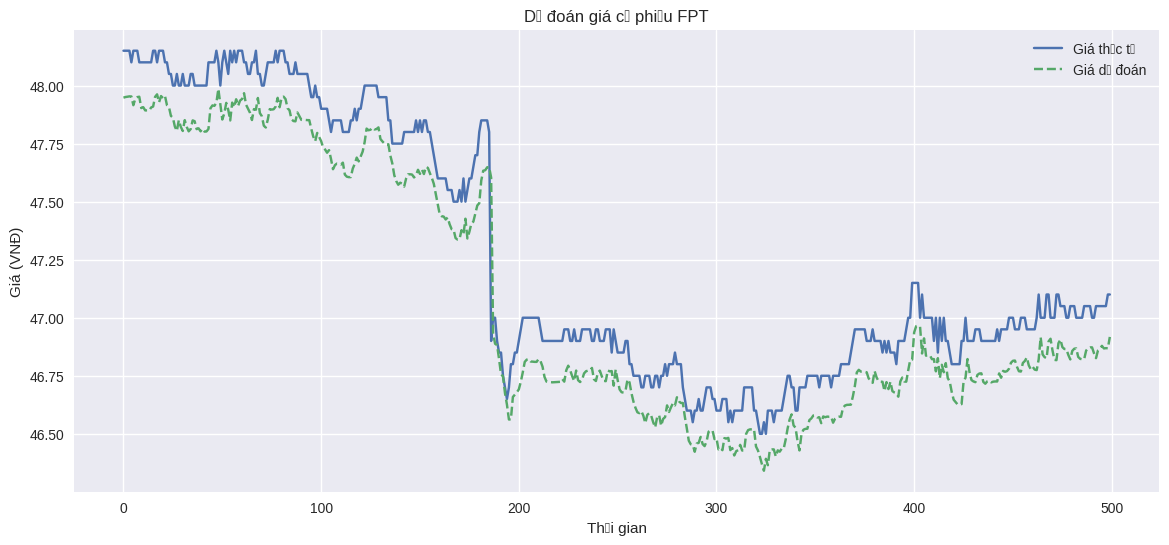

In [76]:
# Dự đoán
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(np.concatenate([predictions, np.zeros((predictions.shape[0], len(selected_features)-1))], axis=1))[:, 0]
y_test_unscaled = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], len(selected_features)-1))], axis=1))[:, 0]

# Đánh giá
mse = mean_squared_error(y_test_unscaled, predictions)
rmse = np.sqrt(mse)
print(f'{ticker} - MSE: {mse}, RMSE: {rmse}')

# Trực quan hóa
plt.figure(figsize=(14, 6))
plt.plot(y_test_unscaled[:500], label='Giá thực tế')
plt.plot(predictions[:500], label='Giá dự đoán', linestyle='--')
plt.title(f'Dự đoán giá cổ phiếu {ticker}')
plt.xlabel('Thời gian')
plt.ylabel('Giá (VNĐ)')
plt.legend()
plt.grid(True)
plt.show()

In [78]:
temp_close = df_features['Close'].iloc[-seq_length:].tolist()
for i in range(30):
    pred = model.predict(last_sequence.reshape(1, seq_length, len(selected_features)), verbose=0)
    pred_unscaled = scaler.inverse_transform(np.concatenate([pred, np.zeros((1, len(selected_features)-1))], axis=1))[:, 0]
    temp_close.append(pred_unscaled[0])
    ma_5 = np.mean(temp_close[-5:])
    # Cập nhật last_sequence với MA_5 mới (cần chuẩn hóa lại)

In [95]:
def process_and_predict_stock(df, ticker, N=60, time_unit="minute", seq_length=60):
    # Xử lý dữ liệu với smart_price_change
    df_processed = smart_price_change(df, N=N, time_unit=time_unit)
    
    # Tạo đặc trưng
    df_features = create_features(df_processed, date_column="Date/Time_x")
    
    # Chọn lọc đặc trưng
    selected_features = ['Close', 'MA_5', 'EMA_5', 'Volume_MA_5', 'Price_Range']
    
    # Chuẩn hóa dữ liệu
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df_features[selected_features])
    
    # Tạo chuỗi
    X, y = create_sequences(scaled_data, seq_length)
    
    # Tách train/test
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    
    # Xây dựng và huấn luyện mô hình
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, len(selected_features))))
    model.add(LSTM(50, return_sequences=True))
    model.add(LSTM(50))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_test, y_test))
    
    # Dự đoán
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(np.concatenate([predictions, np.zeros((predictions.shape[0], len(selected_features)-1))], axis=1))[:, 0]
    y_test_unscaled = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], len(selected_features)-1))], axis=1))[:, 0]
    
    # Đánh giá
    mse = mean_squared_error(y_test_unscaled, predictions)
    rmse = np.sqrt(mse)
    print(f'{ticker} - MSE: {mse}, RMSE: {rmse}')
    
    # Trực quan hóa
    plt.figure(figsize=(14, 6))
    plt.plot(y_test_unscaled[:500], label='Giá thực tế')
    plt.plot(predictions[:500], label='Giá dự đoán', linestyle='--')
    plt.title(f'Dự đoán giá cổ phiếu {ticker}')
    plt.xlabel('Thời gian')
    plt.ylabel('Giá (VNĐ)')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return model, scaler, predictions

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
794/794 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.0078 - val_loss: 8.6549e-05
Epoch 2/20
794/794 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 0.0018 - val_loss: 6.1684e-05
Epoch 3/20
794/794 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 0.0011 - val_loss: 8.2771e-05
Epoch 4/20
794/794 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 9.7023e-04 - val_loss: 4.4614e-05
Epoch 5/20
794/794 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 9.7130e-04 - val_loss: 1.1261e-04
Epoch 6/20
794/794 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 9.5051e-04 - val_loss: 5.4126e-05
Epoch 7/20
794/794 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 9.6500e-04 - val_loss: 4.1071e-05
Epoch 8/20
794/794 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 9.6219e-04 - val_loss: 1.6178e-04
Epoch 9/20
794/794 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 9.4610e-04 - val_loss: 3.3131e-05
Epoch 10/20
794/794 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 9.3713e-04 - val_loss: 3.6598e-05
Epoch 11/20
794/794 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7921 (\N{LATIN SMALL LETTER U WITH HORN AND DOT BELOW}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7893 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND HOOK ABOVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7871 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7901 (\N{LATIN SMALL LETTER O WITH HORN AND GRAVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


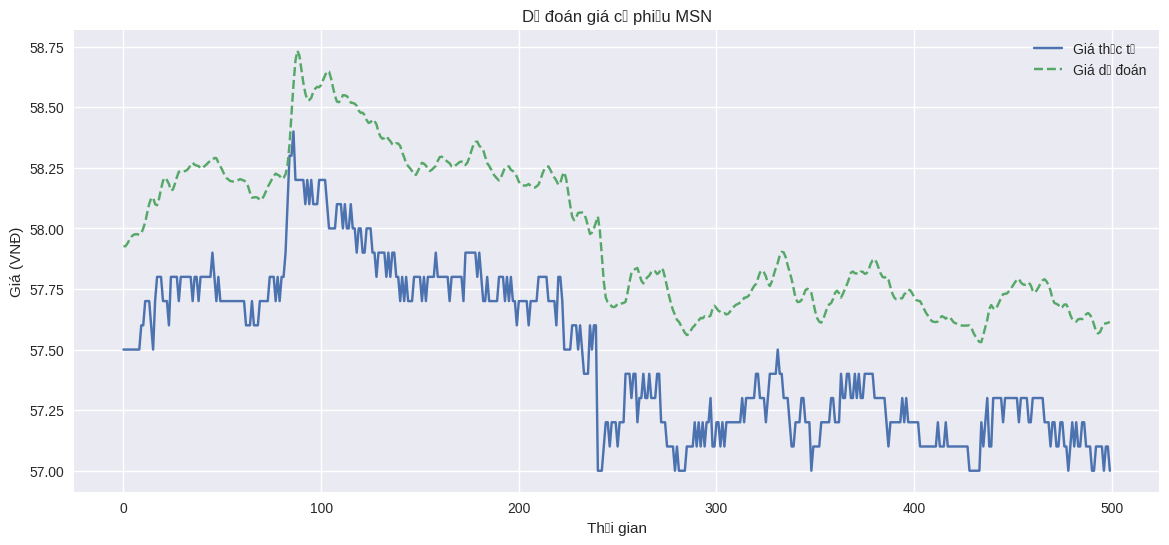

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
725/725 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.0167 - val_loss: 1.8241e-04
Epoch 2/20
725/725 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0042 - val_loss: 4.9711e-05
Epoch 3/20
725/725 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.0019 - val_loss: 6.5518e-05
Epoch 4/20
725/725 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0011 - val_loss: 6.9056e-05
Epoch 5/20
725/725 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 9.2059e-04 - val_loss: 1.3542e-04
Epoch 6/20
725/725 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 9.0367e-04 - val_loss: 6.0217e-05
Epoch 7/20
725/725 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 9.2238e-04 - val_loss: 1.1021e-04
Epoch 8/20
725/725 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 9.0145e-04 - val_loss: 8.2843e-05
Epoch 9/20
725/725 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 9.1365e-04 - val_loss: 3.1732e-05
Epoch 10/20
725/725 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 8.9659e-04 - val_loss: 2.1153e-04
Epoch 11/20
725/725 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 8.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7921 (\N{LATIN SMALL LETTER U WITH HORN AND DOT BELOW}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7893 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND HOOK ABOVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7871 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7901 (\N{LATIN SMALL LETTER O WITH HORN AND GRAVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


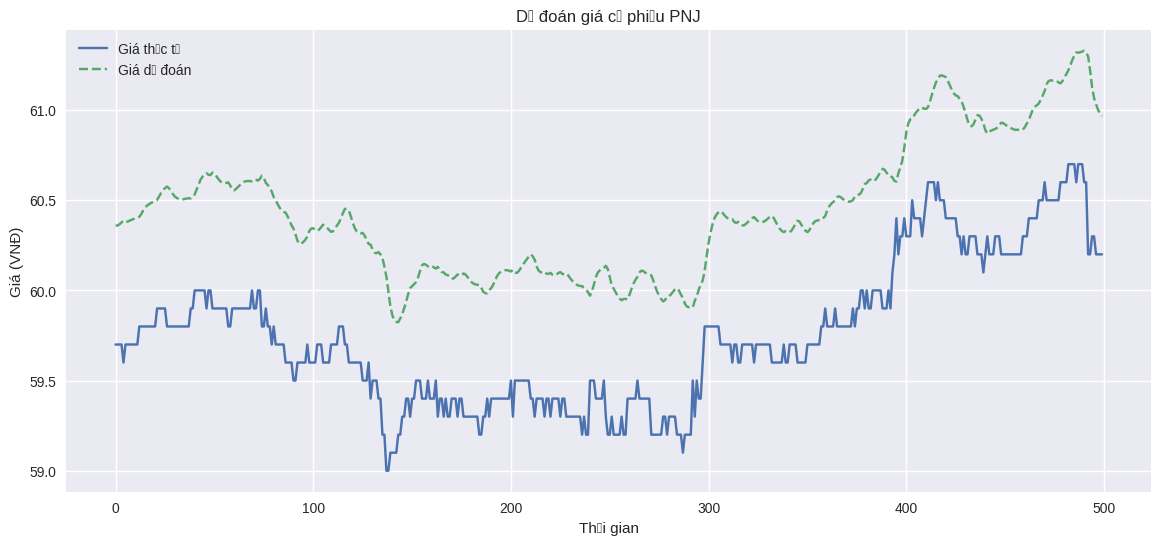

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
566/566 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.0279 - val_loss: 4.7670e-05
Epoch 2/20
566/566 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0068 - val_loss: 5.1160e-05
Epoch 3/20
566/566 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0040 - val_loss: 5.8391e-05
Epoch 4/20
566/566 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0022 - val_loss: 5.2613e-05
Epoch 5/20
566/566 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0013 - val_loss: 4.6835e-05
Epoch 6/20
566/566 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0010 - val_loss: 5.9442e-05
Epoch 7/20
566/566 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 9.5333e-04 - val_loss: 4.5458e-05
Epoch 8/20
566/566 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0010 - val_loss: 3.6362e-05
Epoch 9/20
566/566 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 9.6050e-04 - val_loss: 5.9254e-05
Epoch 10/20
566/566 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 9.6752e-04 - val_loss: 1.1235e-04
Epoch 11/20
566/566 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 9.8865e-04 - va

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7921 (\N{LATIN SMALL LETTER U WITH HORN AND DOT BELOW}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7893 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND HOOK ABOVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7871 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7901 (\N{LATIN SMALL LETTER O WITH HORN AND GRAVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


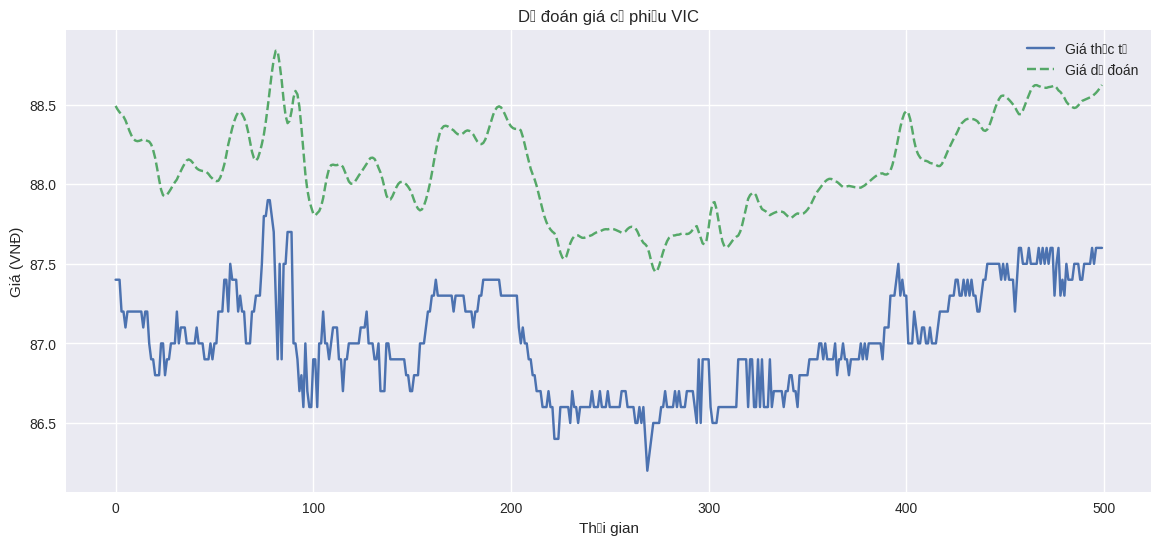

In [96]:
for ticker in ['MSN', 'PNJ', 'VIC']:
    df = pd.read_csv(f'/kaggle/input/stock-dataset/{ticker}.csv')
    process_and_predict_stock(df, ticker, N=3, time_unit="month")